In [92]:
from pathlib import Path
import csv

# TASK_NAME = 'OR_trainval_TMP'
TASK_NAME = 'OR_matseg_trainval'
csv_file_root = Path('/home/ruizhu/Documents/Projects/Mask3D/saved/%s/0'%TASK_NAME)
assert Path(csv_file_root).exists()

csv_heads = []
csv_lines = []
for _ in csv_file_root.glob('*'):
    csv_file_path = _ / 'metrics.csv'
    if csv_file_path.exists():
        cvs_file_list.append(csv_file_path) 

        # opening the CSV file
        with open(str(csv_file_path), mode ='r')as file:
            # reading the CSV file
            csvFile = csv.reader(file)
            
            # displaying the contents of the CSV file
            for line in csvFile:
                # print(line)
                if 'lr-' in line[0]:
                    csv_heads.append(line)
                    assert line == csv_heads[-1] # all heeads are the same
                else:
                    csv_lines.append(line)

In [93]:
csv_head = csv_heads[0]

print(csv_head)

from matplotlib import pyplot as plt
import numpy as np

key_x = 'step'; key_x_index = csv_head.index(key_x)

plot_dict = {}
for key_y in ['lr-AdamW', 'train_loss_ce', 'train_loss_mask', 'train_loss_dice', 'epoch']:
    key_x_list = np.array([_[key_x_index] for _ in csv_lines]).astype(np.int32)
    key_y_index = csv_head.index(key_y)
    key_y_list = np.array([float(_[key_y_index]) if _[key_y_index] !='' else -1 for _ in csv_lines]).astype(np.float32)
    sort_index = np.argsort(key_x_list)
    sort_index = [_ for _ in sort_index if key_y_list[_] != -1]
    key_x_list = key_x_list[sort_index]
    key_y_list = key_y_list[sort_index]

    print(key, len(key_x_list), key_x_list[:5], np.amax(key_x_list), np.amin(key_x_list), np.amax(key_y_list), np.amin(key_y_list))
    plot_dict[key_y] = {'key_x_list': key_x_list, 'key_y_list': key_y_list}

['lr-AdamW', 'step', 'train_loss_ce', 'train_loss_mask', 'train_loss_dice', 'train_loss_ce_0', 'train_loss_mask_0', 'train_loss_dice_0', 'train_loss_ce_1', 'train_loss_mask_1', 'train_loss_dice_1', 'train_loss_ce_2', 'train_loss_mask_2', 'train_loss_dice_2', 'train_loss_ce_3', 'train_loss_mask_3', 'train_loss_dice_3', 'train_loss_ce_4', 'train_loss_mask_4', 'train_loss_dice_4', 'train_loss_ce_5', 'train_loss_mask_5', 'train_loss_dice_5', 'train_loss_ce_6', 'train_loss_mask_6', 'train_loss_dice_6', 'train_loss_ce_7', 'train_loss_mask_7', 'train_loss_dice_7', 'train_loss_ce_8', 'train_loss_mask_8', 'train_loss_dice_8', 'train_loss_ce_9', 'train_loss_mask_9', 'train_loss_dice_9', 'train_loss_ce_10', 'train_loss_mask_10', 'train_loss_dice_10', 'train_loss_ce_11', 'train_loss_mask_11', 'train_loss_dice_11', 'train_mean_loss_ce', 'train_mean_loss_mask', 'train_mean_loss_dice', 'epoch', 'train_loss_mean']
train_loss_dice 2305 [ 49  99 149 199 249] 121549 49 3.946299e-05 4.000007e-06
train_los

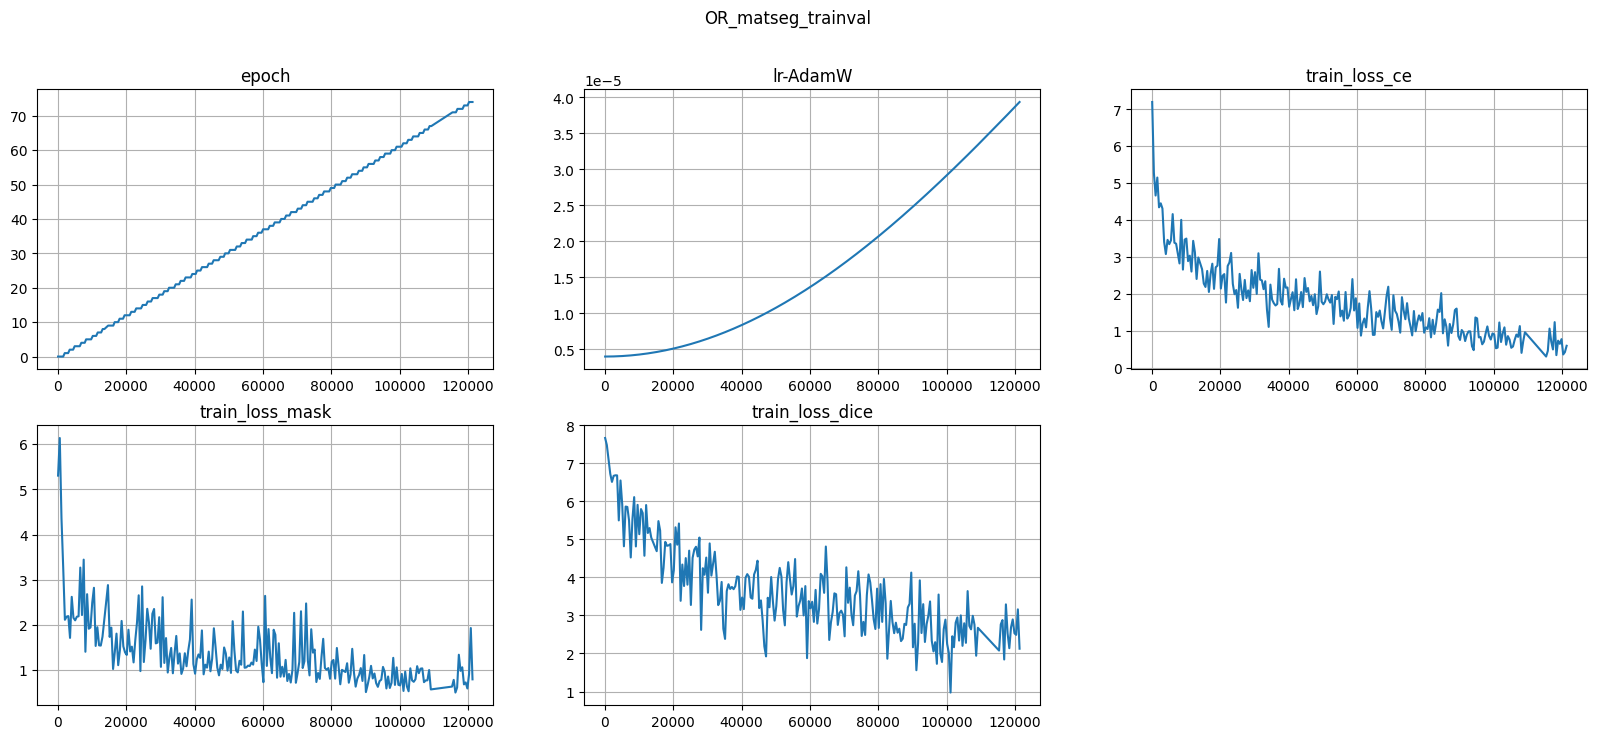

In [94]:
show_every = 10

plt.figure(figsize=(20, 8))
plt.suptitle(TASK_NAME)
for plot_idx in range(5):
    key = ['epoch', 'lr-AdamW', 'train_loss_ce', 'train_loss_mask', 'train_loss_dice'][plot_idx]
    key_x_list_ = plot_dict[key]['key_x_list']
    key_y_list_ = plot_dict[key]['key_y_list']
    ax = plt.subplot(2, 3, plot_idx+1)
    ax.set_title(key)
    plt.plot(key_x_list_[::show_every], key_y_list_[::show_every])
    plt.grid()
plt.show()